In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict

## Extracting data from UniProtKB

In [ ]:
!rm -rf 'api_data.tsv'

In [ ]:
!wget -O 'api_data.tsv' 'https://rest.uniprot.org/uniprotkb/stream?compressed=true&fields=accession%2Cid%2Corganism_name%2Clength%2Csequence%2Cgo_p%2Cgo_c%2Cgo_f%2Cgo%2Cgo_id&format=tsv&query=%28%2A%29%20AND%20%28reviewed%3Atrue%29'

--2022-09-21 09:43:48--  https://rest.uniprot.org/uniprotkb/stream?compressed=true&fields=accession%2Cid%2Corganism_name%2Clength%2Csequence%2Cgo_p%2Cgo_c%2Cgo_f%2Cgo%2Cgo_id&format=tsv&query=%28%2A%29%20AND%20%28reviewed%3Atrue%29
Resolving rest.uniprot.org (rest.uniprot.org)... 193.62.192.81
Connecting to rest.uniprot.org (rest.uniprot.org)|193.62.192.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘api_data.tsv’

api_data.tsv            [             <=>    ]   5.74M   768KB/s               ^C


In [ ]:
df = pd.read_csv('api_data.tsv',sep='\t',compression='gzip')
df

In [ ]:
df.to_csv('drive/MyDrive/mp/scraped_data.csv')

In [ ]:
from collections import defaultdict

s = defaultdict(int)
# for i in range(len(df)):
for item in df['Gene Ontology IDs']:
  try:
    sp=item.split(';')
    for j in sp:
      s[j]+=1
  except:
    pass

c=0
for key in s.keys():
  if s[key]< 200:
    c+=1
print(c)

## If already extracted, fetch stored csv

In [ ]:
!gdown https://drive.google.com/uc?id=1YbVYIFjVvTwxqy1lI6w26P2ZHj_ZX82j

Downloading...
From: https://drive.google.com/uc?id=1YbVYIFjVvTwxqy1lI6w26P2ZHj_ZX82j
To: /content/scraped_data.csv
100% 556M/556M [00:02<00:00, 256MB/s]


In [ ]:
df = pd.read_csv('scraped_data.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,Entry,Entry Name,Organism,Length,Sequence,Gene Ontology (biological process),Gene Ontology (cellular component),Gene Ontology (molecular function),Gene Ontology (GO),Gene Ontology IDs
0,A0A024B7W1,POLG_ZIKVF,Zika virus (isolate ZIKV/Human/French Polynesi...,3423,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...,clathrin-dependent endocytosis of virus by hos...,extracellular region [GO:0005576]; host cell e...,"4 iron, 4 sulfur cluster binding [GO:0051539];...",extracellular region [GO:0005576]; host cell e...,GO:0003724; GO:0003725; GO:0003968; GO:0004252...
1,A0A024SC78,CUTI1_HYPJR,Hypocrea jecorina (strain ATCC 56765 / BCRC 32...,248,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,NaN,extracellular region [GO:0005576],cutinase activity [GO:0050525],extracellular region [GO:0005576]; cutinase ac...,GO:0005576; GO:0050525
2,A0A024SH76,GUX2_HYPJR,Hypocrea jecorina (strain ATCC 56765 / BCRC 32...,471,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,cellulose catabolic process [GO:0030245],extracellular region [GO:0005576],"cellulose 1,4-beta-cellobiosidase activity [GO...",extracellular region [GO:0005576]; cellulose 1...,GO:0005576; GO:0016162; GO:0030245; GO:0030248
3,A0A026W182,ORCO_OOCBI,Ooceraea biroi (Clonal raider ant) (Cerapachys...,478,MMKMKQQGLVADLLPNIRVMKTFGHFVFNYYNDNSSKYLHKVYCCV...,antennal development [GO:0007469]; detection o...,integral component of membrane [GO:0016021]; p...,odorant binding [GO:0005549]; olfactory recept...,integral component of membrane [GO:0016021]; p...,GO:0004984; GO:0005549; GO:0005886; GO:0007165...
4,A0A044RE18,BLI_ONCVO,Onchocerca volvulus,693,MYWQLVRILVLFDCLQKILAIEHDSICIADVDDACPEPSHTVMRLR...,dibasic protein processing [GO:0090472]; zymog...,extracellular region [GO:0005576],metal ion binding [GO:0046872]; serine-type en...,extracellular region [GO:0005576]; metal ion b...,GO:0004252; GO:0005576; GO:0031638; GO:0046872...
...,...,...,...,...,...,...,...,...,...,...
567997,W6JGV7,REP_CPBDV,Chaetoceros protobacilladnavirus 2 (Chaetocero...,484,MSAPLSIEQDDLLTDDLKSWLSDIDFSNDNEEAIEMEPSDIEMSSP...,DNA replication [GO:0006260]; viral DNA genome...,host cell nucleus [GO:0042025],NaN,host cell nucleus [GO:0042025]; DNA replicatio...,GO:0006260; GO:0039693; GO:0042025
567998,W6JHZ8,VP1_CPBDV,Chaetoceros protobacilladnavirus 2 (Chaetocero...,210,MNVKGASDKAQLAMQAEWEEVLAPEGALAVEEASSVLKISDDERRS...,NaN,NaN,NaN,NaN,NaN
567999,W6JQK2,YBW7_SCHPO,Schizosaccharomyces pombe (strain 972 / ATCC 2...,268,MIVIEPTILYEAAALYTRYTANGGDSNDVVALLVGPIVQTLSIPSS...,NaN,NaN,NaN,NaN,NaN
568000,X6R8D5,GUCNB_HUMAN,Homo sapiens (Human),127,MGRKEHESPSQPHMCGWEDSQKPSVPSHGPKTPSCKGVKAPHSSRP...,NaN,NaN,NaN,NaN,NaN


In [ ]:
freq = defaultdict(int)
for idx,row in df.iterrows():
  freq[int(row['Length'])]+=1
freq

defaultdict(int,
            {3423: 2,
             248: 1207,
             471: 628,
             478: 588,
             693: 202,
             333: 962,
             742: 124,
             2442: 4,
             455: 563,
             211: 1200,
             512: 576,
             533: 331,
             268: 841,
             299: 1189,
             288: 1010,
             475: 707,
             379: 1903,
             437: 615,
             813: 94,
             421: 786,
             580: 281,
             222: 951,
             526: 364,
             1776: 6,
             628: 227,
             524: 372,
             1299: 27,
             1261: 14,
             515: 495,
             134: 1066,
             559: 317,
             2085: 4,
             459: 727,
             473: 765,
             101: 1671,
             470: 613,
             184: 1144,
             160: 1445,
             573: 254,
             594: 267,
             262: 1085,
             457: 699,
            

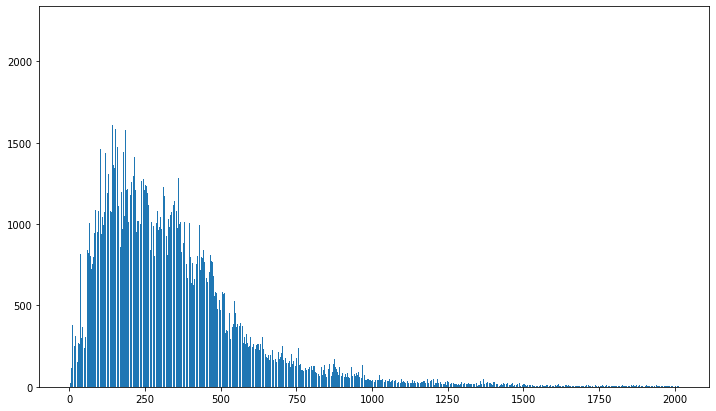

3439


In [ ]:
x = list(freq.keys())
y = list(freq.values())

xy = [[x[i],y[i]] for i in range(len(x))]
xy.sort()

x = [xy[i][0] for i in range(len(xy))]
y = [xy[i][1] for i in range(len(xy))]

plt.figure(figsize=(12,7))
plt.bar(x[:2000],y[:2000])
plt.show()
print(len(x))

In [ ]:
go_freq = defaultdict(int)
for item in df['Gene Ontology IDs']:
  try:
    temp=item.split(';')
    for j in temp:
      j = j.strip()
      go_freq[j]+=1
  except:
    pass

go_terms = []
for key in go_freq.keys():
  if go_freq[key]<200:
    go_terms.append(key)
print(len(go_terms))

27256


In [ ]:
new_df = pd.DataFrame(columns=df.columns)
for idx,row in df.iterrows():
  if idx%1000==0:
    print(idx)
  if idx%20000==0:
    new_df.to_csv('drive/MyDrive/mp/cleaned_data.csv')
    print('data saved at:',idx)
  new_row = row
  val =''
  if row['Gene Ontology IDs'] is not np.nan:
    for go in row['Gene Ontology IDs'].split(';'):
      go = go.strip()
      if go not in go_terms:
        val += go + ';'
  if val!='':
    val = val[:-1]
    new_row[-1] = val
    new_df.loc[len(new_df.index)] = new_row
new_df

0
data saved at: 0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
data saved at: 20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
data saved at: 40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
data saved at: 60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
data saved at: 80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
data saved at: 100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
data saved at: 120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
13

In [ ]:
new_df.to_csv('drive/MyDrive/mp/cleaned_data.csv')

## Post Processing

In [ ]:
# !gdown https://drive.google.com/uc?id=1YfFA-3xT1irldJpFHgCX8Az-DtPsFM8v
!gdown https://drive.google.com/uc?id=1-02ToP0ibssQgTI6Y8Y7R-6e6m5w9pPC

Downloading...
From: https://drive.google.com/uc?id=1-02ToP0ibssQgTI6Y8Y7R-6e6m5w9pPC
To: /content/final_dataset.csv
100% 538M/538M [00:06<00:00, 88.1MB/s]


In [ ]:
cleaned_df = pd.read_csv('final_dataset.csv')
cleaned_df

,Unnamed: 0,Unnamed: 0.1,Entry,Entry Name,Organism,Length,Sequence,Gene Ontology (biological process),Gene Ontology (cellular component),Gene Ontology (molecular function),Gene Ontology (GO),Gene Ontology IDs
0,0,0,A0A024B7W1,POLG_ZIKVF,Zika virus (isolate ZIKV/Human/French Polynesi...,3423,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...,clathrin-dependent endocytosis of virus by hos...,extracellular region [GO:0005576]; host cell e...,"4 iron, 4 sulfur cluster binding [GO:0051539];...",extracellular region [GO:0005576]; host cell e...,GO:0003724;GO:0003725;GO:0003968;GO:0004252;GO...
1,1,1,A0A024SC78,CUTI1_HYPJR,Hypocrea jecorina (strain ATCC 56765 / BCRC 32...,248,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,NaN,extracellular region [GO:0005576],cutinase activity [GO:0050525],extracellular region [GO:0005576]; cutinase ac...,GO:0005576
2,2,2,A0A024SH76,GUX2_HYPJR,Hypocrea jecorina (strain ATCC 56765 / BCRC 32...,471,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,cellulose catabolic process [GO:0030245],extracellular region [GO:0005576],"cellulose 1,4-beta-cellobiosidase activity [GO...",extracellular region [GO:0005576]; cellulose 1...,GO:0005576;GO:0030245
3,3,3,A0A026W182,ORCO_OOCBI,Ooceraea biroi (Clonal raider ant) (Cerapachys...,478,MMKMKQQGLVADLLPNIRVMKTFGHFVFNYYNDNSSKYLHKVYCCV...,antennal development [GO:0007469]; detection o...,integral component of membrane [GO:0016021]; p...,odorant binding [GO:0005549]; olfactory recept...,integral component of membrane [GO:0016021]; p...,GO:0004984;GO:0005549;GO:0005886;GO:0007165;GO...
4,4,4,A0A044RE18,BLI_ONCVO,Onchocerca volvulus,693,MYWQLVRILVLFDCLQKILAIEHDSICIADVDDACPEPSHTVMRLR...,dibasic protein processing [GO:0090472]; zymog...,extracellular region [GO:0005576],metal ion binding [GO:0046872]; serine-type en...,extracellular region [GO:0005576]; metal ion b...,GO:0004252;GO:0005576;GO:0046872
...,...,...,...,...,...,...,...,...,...,...,...,...
537645,537645,180623,T2KN80,PLH22_FORAG,Formosa agariphila (strain DSM 15362 / KCTC 12...,272,MCTTAWATAQPVIKPPKGRIAIIADGNSPDPDDLGGTAISLALLRA...,NaN,periplasmic space [GO:0042597],NaN,periplasmic space [GO:0042597],GO:0042597
537646,537646,180624,V5XVW4,CAPSD_BPS25,Staphylococcus phage S25-3,463,MTIEKNLSDVQQKYADQFQEDVVKSFQTGYGITPDTQIDAGALRRE...,NaN,viral capsid [GO:0019028],NaN,viral capsid [GO:0019028],GO:0019028
537647,537647,180625,V5XWI9,CAPSD_BPS24,Staphylococcus phage S25-4,463,MTIEKNLSDVQQKYADQFQEDVVKSFQTGYGITPDTQIDAGALRRE...,NaN,viral capsid [GO:0019028],NaN,viral capsid [GO:0019028],GO:0019028
537648,537648,180626,V9HVX0,YPAA_ECOLI,Escherichia coli (strain K12),61,MTIAERLRQEGHQIGWQEGKLEGLHEQAIKIALRMLEQGFDRDQVL...,DNA recombination [GO:0006310],NaN,double-stranded DNA endodeoxyribonuclease acti...,double-stranded DNA endodeoxyribonuclease acti...,GO:0006310


In [ ]:
len(cleaned_df['Entry'].unique())

537650

## Preparing datasets of three different ontologies

In [ ]:
!gdown https://drive.google.com/uc?id=1YbVYIFjVvTwxqy1lI6w26P2ZHj_ZX82j

Downloading...
From: https://drive.google.com/uc?id=1YbVYIFjVvTwxqy1lI6w26P2ZHj_ZX82j
To: /content/scraped_data.csv
100% 556M/556M [00:02<00:00, 274MB/s]


In [ ]:
df = pd.read_csv('scraped_data.csv')
df = df.drop('Unnamed: 0', axis=1)
df = df.sample(frac=1,random_state=16).reset_index(drop=True)
df

,Entry,Entry Name,Organism,Length,Sequence,Gene Ontology (biological process),Gene Ontology (cellular component),Gene Ontology (molecular function),Gene Ontology (GO),Gene Ontology IDs
0,P83620,TXC1B_CUPSA,Cupiennius salei (American wandering spider),35,GFGSLFKFLAKKVAKTVAKQAAKQGAKYIANKQME,defense response to bacterium [GO:0042742]; he...,extracellular region [GO:0005576],toxin activity [GO:0090729],extracellular region [GO:0005576]; toxin activ...,GO:0005576; GO:0042742; GO:0044179; GO:0090729
1,F4KFS5,GMI1_ARATH,Arabidopsis thaliana (Mouse-ear cress),1598,MSSRRSVKRSLVLDDDDDEDIFYNFKVLLPNGTSVKLTLKNPEPEI...,double-strand break repair via homologous reco...,nucleus [GO:0005634],NaN,nucleus [GO:0005634]; double-strand break repa...,GO:0000724; GO:0005634
2,P0C5M6,YE020_YEAST,Saccharomyces cerevisiae (strain ATCC 204508 /...,65,MMHVCSLLVSFDVVKSLTQSVKHLSTRLEYKRMKSFICFCSTTFWN...,NaN,NaN,NaN,NaN,NaN
3,Q5R033,RL27_IDILO,Idiomarina loihiensis (strain ATCC BAA-735 / D...,85,MAHKKAGGSTKNGRDSESKRLGVKRFGGESVLAGNILVRQRGTKFH...,translation [GO:0006412],ribosome [GO:0005840],structural constituent of ribosome [GO:0003735],ribosome [GO:0005840]; structural constituent ...,GO:0003735; GO:0005840; GO:0006412
4,Q54NM7,Y6364_DICDI,Dictyostelium discoideum (Slime mold),219,MIINNQNSPQSINTPSSVSSRQHINKSKKKKENVIKRMLIRLSNSN...,NaN,integral component of membrane [GO:0016021],NaN,integral component of membrane [GO:0016021],GO:0016021
...,...,...,...,...,...,...,...,...,...,...
567997,P49669,RL4_TRYBB,Trypanosoma brucei brucei,374,MTARPSVSVYSASEDKVVGTCSLPAVFTAPIRHDVVQFVHTNMAKN...,translation [GO:0006412],ribosome [GO:0005840],structural constituent of ribosome [GO:0003735],ribosome [GO:0005840]; structural constituent ...,GO:0003735; GO:0005840; GO:0006412
567998,Q8NR49,NUCS_CORGL,Corynebacterium glutamicum (strain ATCC 13032 ...,230,MRLVIARCSVDYVGRLEAHLPSADRLLMVKADGSVSIHADDRAYKP...,NaN,cytoplasm [GO:0005737],DNA binding [GO:0003677]; single-stranded DNA ...,cytoplasm [GO:0005737]; DNA binding [GO:000367...,GO:0000014; GO:0003677; GO:0005737
567999,B4KA44,EIF3A_DROMO,Drosophila mojavensis (Fruit fly),1129,MARYTQRPENALKRANEFIEVGKPLRALDTLQEVFRNKRWNYAYSE...,formation of cytoplasmic translation initiatio...,eukaryotic 43S preinitiation complex [GO:00162...,RNA binding [GO:0003723]; translation initiati...,eukaryotic 43S preinitiation complex [GO:00162...,GO:0001732; GO:0003723; GO:0003743; GO:0005852...
568000,Q9SA76,PPR64_ARATH,Arabidopsis thaliana (Mouse-ear cress),1006,MAVTISTNAFVNASLLDESRNSFWRPLFHQPYYNCRRVVRLNSRKL...,chloroplast mRNA processing [GO:0010239]; chlo...,chloroplast [GO:0009507],mRNA binding [GO:0003729],chloroplast [GO:0009507]; mRNA binding [GO:000...,GO:0003729; GO:0009507; GO:0009658; GO:0009793...


In [ ]:

def get_ontologies(target_col):
  go_freq = defaultdict(int)
  COUNT_REQUIRED = 100000
  count = 0
  indices_list = []


  for idx in range(len(df)):
    if count >= COUNT_REQUIRED:
      break
    if df.iloc[idx]['Length']>=100 and df.iloc[idx]['Length']<=2000 and df.iloc[idx][target_col] is not np.nan:
      indices_list.append(idx)
      count+=1
    else:
      continue
    
    item = df.iloc[idx][target_col]
    try:
      s = item.split(';')
      for ontology in s:
        # assuming only one GO term will be there, fecth first index
        go_freq[re.findall('GO:[0-9]{7}',ontology.strip())[0]]+=1
    except:
      pass

  
  go_terms = []
  for key in go_freq.keys():
    if go_freq[key]<200:
      go_terms.append(key)

  print('Total no. of GO terms:', len(go_freq))
  print('GO terms with less than 200 annotations:',len(go_terms))
  print('GO terms with greater than 200 annotations:',len(go_freq)-len(go_terms),end='\n\n')

  return go_freq, go_terms, indices_list

In [ ]:
# value_counts
target_col = 'Gene Ontology (biological process)'
indices_list = df[df['Length'].between(100,2000,inclusive='both') & df[target_col].notna()].index.values[:100000]
df[df.index.isin(indices_list)][target_col].str.findall(r'GO:[0-9]{7}')

1                                              [GO:0000724]
5                      [GO:0044211, GO:0016310, GO:0044206]
6         [GO:0030855, GO:0030389, GO:0030393, GO:001631...
7                      [GO:0046486, GO:0016310, GO:0007205]
8                                  [GO:0006629, GO:0007585]
                                ...                        
138606                                         [GO:0006423]
138607                                         [GO:0006412]
138608                             [GO:0071973, GO:0006935]
138609                                         [GO:0044208]
138611                 [GO:0050886, GO:0016226, GO:0097428]
Name: Gene Ontology (biological process), Length: 100000, dtype: object

In [ ]:
def regex_replace(row):
  global go_terms
  all = [term for term in re.findall('GO:[0-9]{7}',row) if term not in go_terms]
  if len(all) > 0:
    return ';'.join(all)
  else:
    return np.nan

In [ ]:
go_freq, go_terms, indices_list = get_ontologies('Gene Ontology (biological process)')

Total no. of GO terms: 14363
GO terms with less than 200 annotations: 14162
GO terms with greater than 200 annotations: 201



In [ ]:
target_col = 'Gene Ontology (biological process)'
new_df = df[df.index.isin(indices_list)]
new_df = new_df[['Entry', 'Entry Name', 'Organism', 'Length', 'Sequence', target_col]]
new_df[target_col] = new_df[target_col].apply(regex_replace)
new_df = new_df.dropna().reset_index(drop=True)
new_df

,Entry,Entry Name,Organism,Length,Sequence,Gene Ontology (biological process)
0,F4KFS5,GMI1_ARATH,Arabidopsis thaliana (Mouse-ear cress),1598,MSSRRSVKRSLVLDDDDDEDIFYNFKVLLPNGTSVKLTLKNPEPEI...,GO:0000724
1,B4ESY8,URK_PROMH,Proteus mirabilis (strain HI4320),213,MADTAHQCTIVGIAGASASGKSLIASTLYRELRAQVGDHNIGVIPE...,GO:0016310
2,Q9H479,FN3K_HUMAN,Homo sapiens (Human),309,MEQLLRAELRTATLRAFGGPGAGCISEGRAYDTDAGPVFVKVNRRT...,GO:0016310
3,B4PRE2,DGKH_DROYA,Drosophila yakuba (Fruit fly),1917,MSHLKLDTLHVQRSPRGSRRSSRSSGRSSACSSGSISPVPIIPIIS...,GO:0016310
4,P17129,PSPB_CANLF,Canis lupus familiaris (Dog) (Canis familiaris),363,LLWLLLLPTLCGLGAADWSAPSLACARGPAFWCQSLEQALQCRALG...,GO:0006629
...,...,...,...,...,...,...
72465,P44371,RS2_HAEIN,Haemophilus influenzae (strain ATCC 51907 / DS...,240,MAQVSMRDMINAGVHFGHQTRYWNPQMKPFIFGARNGVHIINLEKT...,GO:0006412
72466,A1V880,RS13_BURMS,Burkholderia mallei (strain SAVP1),121,MARIAGVNIPNHQHTEIGLTAIFGIGRTRARSICVASGVAFSKKVK...,GO:0006412
72467,Q04955,FLIG_CAUVC,Caulobacter vibrioides (strain ATCC 19089 / CB...,340,MAMKLAVNDVKNLSGPEKAAIVLLALGEDHTRIWEALDDEEIKEVS...,GO:0006935
72468,B5R0P3,PURA_SALEP,Salmonella enteritidis PT4 (strain P125109),432,MGNNVVVLGTQWGDEGKGKIVDLLTERAKYVVRYQGGHNAGHTLVI...,GO:0044208


In [ ]:
new_df.to_csv('drive/MyDrive/mp/biological_process.csv',index=False)

In [ ]:
go_freq, go_terms, indices_list = get_ontologies('Gene Ontology (molecular function)')

Total no. of GO terms: 6078
GO terms with less than 200 annotations: 5929
GO terms with greater than 200 annotations: 149



In [ ]:
target_col = 'Gene Ontology (molecular function)'
new_df = df[df.index.isin(indices_list)]
new_df = new_df[['Entry', 'Entry Name', 'Organism', 'Length', 'Sequence', target_col]]
new_df[target_col] = new_df[target_col].apply(regex_replace)
new_df = new_df.dropna().reset_index(drop=True)
new_df

,Entry,Entry Name,Organism,Length,Sequence,Gene Ontology (molecular function)
0,B4ESY8,URK_PROMH,Proteus mirabilis (strain HI4320),213,MADTAHQCTIVGIAGASASGKSLIASTLYRELRAQVGDHNIGVIPE...,GO:0005524
1,Q9H479,FN3K_HUMAN,Homo sapiens (Human),309,MEQLLRAELRTATLRAFGGPGAGCISEGRAYDTDAGPVFVKVNRRT...,GO:0005524;GO:0016301
2,B4PRE2,DGKH_DROYA,Drosophila yakuba (Fruit fly),1917,MSHLKLDTLHVQRSPRGSRRSSRSSGRSSACSSGSISPVPIIPIIS...,GO:0005524;GO:0046872
3,A3DMQ4,RS4_STAMF,Staphylothermus marinus (strain ATCC 43588 / D...,168,MGDPKKPRKKWEGPRHPWRKEVLVQELKLLGTYGLRNKRELWRAQT...,GO:0019843;GO:0003735
4,P55656,Y4SO_SINFN,Sinorhizobium fredii (strain NBRC 101917 / NGR...,705,MENKSLQPPLPRSERRIRVLHNDVTIDSYGWLRDREDPDVLAYLEA...,GO:0004252
...,...,...,...,...,...,...
76736,Q7U7P8,BIOB_PARMW,Parasynechococcus marenigrum (strain WH8102),325,MTFTIRHDWTIAEIQALLELPLMELLWQAQYVHRAANPGYRVQLAS...,GO:0051537;GO:0051539;GO:0005506
76737,Q55855,GLK_SYNY3,Synechocystis sp. (strain PCC 6803 / Kazusa),355,MGAMGVNFLAGDIGGTKTILALVTINESSPGLARPVTLFEQTYSSP...,GO:0005524
76738,Q7TPM3,TRI17_MOUSE,Mus musculus (Mouse),477,MDAVELARRLQEEATCSICLDYFTDPVMTACGHNFCRECIQMSWEK...,GO:0061630;GO:0004842;GO:0008270
76739,B1IPK9,SYT_ECOLC,Escherichia coli (strain ATCC 8739 / DSM 1576 ...,642,MPVITLPDGSQRHYDHAVSPMDVALDIGPGLAKACIAGRVNGELVD...,GO:0005524;GO:0046872;GO:0000049


In [ ]:
new_df.to_csv('drive/MyDrive/mp/molecular_function.csv',index=False)

In [ ]:
go_freq, go_terms, indices_list = get_ontologies('Gene Ontology (cellular component)')

Total no. of GO terms: 2475
GO terms with less than 200 annotations: 2370
GO terms with greater than 200 annotations: 105



In [ ]:
target_col = 'Gene Ontology (cellular component)'
new_df = df[df.index.isin(indices_list)]
new_df = new_df[['Entry', 'Entry Name', 'Organism', 'Length', 'Sequence', target_col]]
new_df[target_col] = new_df[target_col].apply(regex_replace)
new_df = new_df.dropna().reset_index(drop=True)
new_df

,Entry,Entry Name,Organism,Length,Sequence,Gene Ontology (cellular component)
0,F4KFS5,GMI1_ARATH,Arabidopsis thaliana (Mouse-ear cress),1598,MSSRRSVKRSLVLDDDDDEDIFYNFKVLLPNGTSVKLTLKNPEPEI...,GO:0005634
1,Q54NM7,Y6364_DICDI,Dictyostelium discoideum (Slime mold),219,MIINNQNSPQSINTPSSVSSRQHINKSKKKKENVIKRMLIRLSNSN...,GO:0016021
2,B4ESY8,URK_PROMH,Proteus mirabilis (strain HI4320),213,MADTAHQCTIVGIAGASASGKSLIASTLYRELRAQVGDHNIGVIPE...,GO:0005737
3,Q9H479,FN3K_HUMAN,Homo sapiens (Human),309,MEQLLRAELRTATLRAFGGPGAGCISEGRAYDTDAGPVFVKVNRRT...,GO:0005829
4,B4PRE2,DGKH_DROYA,Drosophila yakuba (Fruit fly),1917,MSHLKLDTLHVQRSPRGSRRSSRSSGRSSACSSGSISPVPIIPIIS...,GO:0005737
...,...,...,...,...,...,...
95312,Q8A9V4,ATPB_BACTN,Bacteroides thetaiotaomicron (strain ATCC 2914...,505,MSQIIGHISQVIGPVVDVYFEGTDAELMLPSIHDALEIKRPNGKIL...,GO:0005886;GO:0045261
95313,A1BCE9,MACB3_PARDP,Paracoccus denitrificans (strain Pd 1222),640,MPLIRIRGLHRVFGEGAARAHVLRGIDLDIHAGEFVAIVGTSGSGK...,GO:0016021;GO:0005886
95314,Q9HIS8,RL30_THEAC,Thermoplasma acidophilum (strain ATCC 25905 / ...,165,MLAVIRIRGRTGIKEDIADTAHLMRLNRINHLVLLNENEVVKGMLQ...,GO:0015934
95315,Q3J2I9,AROK_CERS4,Cereibacter sphaeroides (strain ATCC 17023 / D...,199,MKVGAEVRRRGNREDGRQVMARLKKTVVMVGMMGAGKTAVGSALAR...,GO:0005737


In [ ]:
new_df.to_csv('drive/MyDrive/mp/cellular_component.csv',index=False)

In [ ]:
def plot_freq_dist(df,target):
  freq = defaultdict(int)
  for idx,row in df.iterrows():
    freq[int(row['Length'])]+=1

  x = list(freq.keys())
  y = list(freq.values())

  xy = [[x[i],y[i]] for i in range(len(x))]
  xy.sort()

  x = [xy[i][0] for i in range(len(xy))]
  y = [xy[i][1] for i in range(len(xy))]

  plt.figure(figsize=(12,7))
  plt.title(target)
  plt.xlabel('Sequence Length')
  plt.ylabel('No. of sequences')
  plt.bar(x,y)
  plt.show()

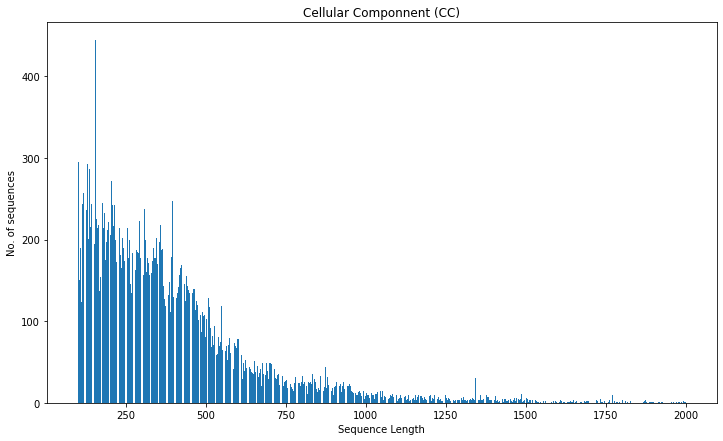

In [ ]:
plot_freq_dist(new_df,'Cellular Componnent (CC)')

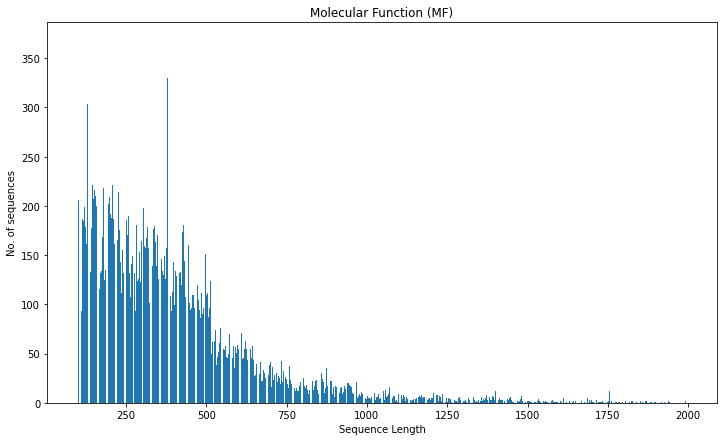

In [ ]:
plot_freq_dist(new_df,'Molecular Function (MF)')

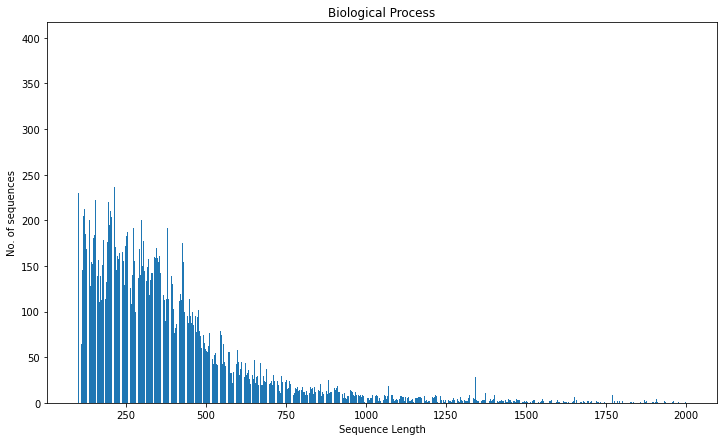

In [ ]:
plot_freq_dist(new_df,'Biological Process')